In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

systemerr=0

In [2]:
def weightedMean(x,xerr): #Takes lists of a value and a values uncertainty, returns 2 variables: the weighted mean, and the mean's uncertainty
    topfrac=0
    botfrac=0
    for i in range(len(x)):
        topfrac+=x[i]/(xerr[i]**2)
        botfrac+=1/(xerr[i]**2)
    mean=topfrac/botfrac
    mean_unc=np.sqrt(1/botfrac)
    return mean,mean_unc

### Importing all the files to dataframes

In [3]:
file="1529094462290O-result.csv" #The Gaia Data file

knownmemberlist="asu.csv" #The known member list data file

martinfile="martindata.csv" #The martin data

norrisdata="NorrisData.csv" #The Norris data

#SELECT TOP 500 ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag, bp_rp FROM gaiadr2.gaia_source  WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',210.025,14.5,0.21333333333333335))=1 AND  (phot_bp_mean_mag>=16 AND phot_g_mean_mag>=16 AND phot_rp_mean_mag>=16 AND phot_g_mean_mag<=20)

In [4]:
#Reading in the two files to dataframes

df=pandas.read_csv(file) #This is the gaia data
dfmember=pandas.read_csv(knownmemberlist) #This is the Koposov data
dfmartin=pandas.read_csv(martinfile)
dfnorris=pandas.read_csv(norrisdata)

dfra=df["ra"].values.tolist() #putting the data from the data frame of position into lists
dfdec=df["dec"].values.tolist() #THIS CHUNK IS GAIA DATA
dfra_error=df["ra_error"].values.tolist()
dfdec_error=df["dec_error"].values.tolist()
dfrapm=df["pmra"].values.tolist()
dfdecpm=df["pmdec"].values.tolist()
dfrapm_error=df["pmra_error"].values.tolist()
dfdecpm_error=df["pmdec_error"].values.tolist()

for i in range(len(dfra)):
    dfrapm_error[i]+=systemerr
    dfdecpm_error[i]+=systemerr

dfmemberra=dfmember["RA"].values.tolist() #Taking member ra and dec from dataframe to list
dfmemberdec=dfmember["DEC"].values.tolist() #THIS CHUNK IS KOPOSOV DATA
dfmemberbestfitflag=dfmember["Mm"].values.tolist()
dfmemberrvall=dfmember["RV"].values.tolist()
dfmemberrvall_error=dfmember["e_RV"].values.tolist()
dfmembergmag=dfmember["gmag"].values.tolist()

martinra=dfmartin["RA"].values.tolist() #THIS CHUNK IS MARTIN DATA
martindec=dfmartin["DEC"].values.tolist()
martinmember=dfmartin["Mm"].values.tolist()

norrisra=dfnorris["RA"].values.tolist() #This chunk is Norris data
norrisdec=dfnorris["DEC"].values.tolist()
norrismember=dfnorris["Mem?"].values.tolist()
norrisrv=dfnorris["RV"].values.tolist()

In [5]:
for i in range(len(dfmemberrvall)): #looping through to evaluate RV values to make it easier later
    if dfmemberrvall[i]!="X":
        dfmemberrvall[i]=eval(dfmemberrvall[i])
        dfmemberrvall_error[i]=eval(dfmemberrvall_error[i])

In [6]:
dfmemberbestra=[]
dfmemberbestdec=[]
dfmembernotbestra=[]
dfmembernotbestdec=[]

for i in range(len(dfmemberbestfitflag)): #finding the ra's and decs for which the points are classified as the best fit, which are not
    if dfmemberbestfitflag[i]=="B":
        dfmemberbestra.append(i)
        dfmemberbestdec.append(i)
    else:
        dfmembernotbestra.append(i)
        dfmembernotbestdec.append(i)

In [7]:
crosscheckpmra=[] #Creating lists to be filled with pm coordinates that were of "Best fit" only sorted by distance
crosscheckpmdec=[]
crosscheckpmra_error=[]
crosscheckpmdec_error=[]

for item in range(len(dfmemberbestra)): #The double for loop for the best fit graph appending stuff by only distance
    dist=10**10
    
    for items in range(len(dfra)):
        newdist=np.sqrt((dfra[items]-dfmemberra[dfmemberbestra[item]])**2+(dfdec[items]-dfmemberdec[dfmemberbestdec[item]])**2)
        if newdist<=dist:
            dist=newdist
            closestpmra=dfrapm[items]
            closestpmdec=dfdecpm[items]
            closestpmra_error=dfrapm_error[items]
            closestpmdec_error=dfdecpm_error[items]
        else:
            dist=dist
    
    if dist<=0.0056: #Checking if the distance is within 2 arc seconds
        crosscheckpmra.append(closestpmra) 
        crosscheckpmdec.append(closestpmdec)
        crosscheckpmra_error.append(closestpmra_error)
        crosscheckpmdec_error.append(closestpmdec_error)

    closestpmra=0
    closestpmdec=0
    closestpmra_error=0
    closestpmdec_error=0

In [8]:
badpmra=[] #Creating lists to be filled with pm coordinates that were of "Not best fit" only sorted by distance
badpmdec=[]
badpmra_error=[]
badpmdec_error=[]


for item in range(len(dfmembernotbestra)): #The double for loop for the not best fit flag coordinates
    dist=10**10
    
    for items in range(len(dfra)):
        newdist=np.sqrt((dfra[items]-dfmemberra[dfmembernotbestra[item]])**2+(dfdec[items]-dfmemberdec[dfmembernotbestdec[item]])**2)
        if newdist<=dist:
            dist=newdist
            closestpmra=dfrapm[items]
            closestpmdec=dfdecpm[items]
            closestpmra_error=dfrapm_error[items]
            closestpmdec_error=dfdecpm_error[items]
        else:
            dist=dist
    
    badpmra.append(closestpmra)
    badpmdec.append(closestpmdec)
    badpmra_error.append(closestpmra_error)
    badpmdec_error.append(closestpmdec_error)
    closestpmra=0
    closestpmdec=0
    closestpmra_error=0
    closestpmdec_error=0

In [9]:
#Filtering by RV's        

koposovmemberrvbestloc=[]
koposovmemberrvworstloc=[]

#looping through to limit the locations to Radial velocities between 95-110 km/s, can change below if you want

for i in range (len(dfmemberrvall)): 
    if dfmemberrvall[i]!="X":
        if dfmemberrvall[i]>=85 and dfmemberrvall[i]<=120:
            koposovmemberrvbestloc.append(i)
        else:
            koposovmemberrvworstloc.append(i)

In [10]:
print("Koposov In RV:", len(koposovmemberrvbestloc))
print("Koposov Out of RV:", len(koposovmemberrvworstloc))
print()

Koposov In RV: 74
Koposov Out of RV: 38



In [11]:
koposovrafit_byrv=[] #member RA's, Dec's, and Errors in the Gaussian to be filled in the next loop
koposovdecfit_byrv=[]

for i in range (len(koposovmemberrvbestloc)): #Appending based on the locations taken above 
    koposovrafit_byrv.append(dfmemberra[koposovmemberrvbestloc[i]])
    koposovdecfit_byrv.append(dfmemberdec[koposovmemberrvbestloc[i]])

In [12]:
koposovranofit_byrv=[] #appending the member stars ra's and dec's that are outside the velocity range
koposovdecnofit_byrv=[]

for i in range (len(koposovmemberrvworstloc)):
    koposovranofit_byrv.append(dfmemberra[koposovmemberrvworstloc[i]])
    koposovdecnofit_byrv.append(dfmemberdec[koposovmemberrvworstloc[i]])

In [13]:
#Finding the closest RA and Dec by filtering through only with the RV locations
kopra_fit_byrv_inrange=[]
kopdec_fit_byrv_inrange=[]

koppmra_fromgaia_byrv_inrange=[] #PROPER MOTIONS for fits by rv
koppmdec_fromgaia_byrv_inrange=[]
koppmra_error_fromgaia_byrv_inrange=[]
koppmdec_error_fromgaia_byrv_inrange=[]

kopra_nofit_byrv_inrange=[]
kopdec_nofit_byrv_inrange=[]

countgood=0
countbad=0

for kop in range( len (koposovrafit_byrv) ):
    dist=10**5
    kopclosera=koposovrafit_byrv[kop]
    kopclosedec=koposovdecfit_byrv[kop]
    for gai in range ( len (dfra) ):
        newdist=np.sqrt((koposovdecfit_byrv[kop]-dfdec[gai])**2+(koposovrafit_byrv[kop]-dfra[gai])**2)
        if newdist<=dist:
            dist=newdist
            kopclosestpmra=dfrapm[gai]
            kopclosestpmdec=dfdecpm[gai]
            kopclosestpmra_error=dfrapm_error[gai]
            kopclosestpmdec_error=dfdecpm_error[gai]

    if dist<=1/1800:
        countgood+=1
        kopra_fit_byrv_inrange.append(kopclosera)
        kopdec_fit_byrv_inrange.append(kopclosedec)
        koppmra_fromgaia_byrv_inrange.append(kopclosestpmra)
        koppmdec_fromgaia_byrv_inrange.append(kopclosestpmdec)
        koppmra_error_fromgaia_byrv_inrange.append(kopclosestpmra_error)
        koppmdec_error_fromgaia_byrv_inrange.append(kopclosestpmdec_error)
        print("Match - Koposov Star in RV range index value:",kop)
        print("Distance:",dist*3600,"arcseconds")
        print("G value:",dfmembergmag[koposovmemberrvbestloc[kop]])
        print("Radial Velocity:",dfmemberrvall[koposovmemberrvbestloc[kop]])
        print()
    
    else:
        kopra_nofit_byrv_inrange.append(kopclosera)
        kopdec_nofit_byrv_inrange.append(kopclosedec)
        print("No Match - Koposov star in RV range index value:",kop)
        print("Distance:",dist*3600,"arcseconds")
        print("G value:",dfmembergmag[koposovmemberrvbestloc[kop]])
        print("Radial Velocity:",dfmemberrvall[koposovmemberrvbestloc[kop]])
        countbad+=1
        print()

print("Number of distance matches in RV range:",countgood)
print("Number of non distance matches in RV range that did not match:",countbad)
print()

No Match - Koposov star in RV range index value: 0
Distance: 8.936462397110068 arcseconds
G value: 21.9
Radial Velocity: 115.4

No Match - Koposov star in RV range index value: 1
Distance: 27.940507782001063 arcseconds
G value: 21.6
Radial Velocity: 103.23

Match - Koposov Star in RV range index value: 2
Distance: 0.05895579940620972 arcseconds
G value: 20.4
Radial Velocity: 101.91

Match - Koposov Star in RV range index value: 3
Distance: 0.14218521732317912 arcseconds
G value: 19.6
Radial Velocity: 90.34

Match - Koposov Star in RV range index value: 4
Distance: 0.08521152451569398 arcseconds
G value: 20.7
Radial Velocity: 99.81

Match - Koposov Star in RV range index value: 5
Distance: 0.29906167360464914 arcseconds
G value: 20.4
Radial Velocity: 97.93

Match - Koposov Star in RV range index value: 6
Distance: 0.05765031614816387 arcseconds
G value: 20.8
Radial Velocity: 103.07

Match - Koposov Star in RV range index value: 7
Distance: 0.18259464692087946 arcseconds
G value: 21.2
Ra

Match - Koposov Star in RV range index value: 68
Distance: 0.06413673713758679 arcseconds
G value: 17.4
Radial Velocity: 106.95

Match - Koposov Star in RV range index value: 69
Distance: 0.17881237270957118 arcseconds
G value: 19.6
Radial Velocity: 95.13

No Match - Koposov star in RV range index value: 70
Distance: 29.54408711858741 arcseconds
G value: 21.9
Radial Velocity: 106.83

Match - Koposov Star in RV range index value: 71
Distance: 0.20259129349809385 arcseconds
G value: 21.0
Radial Velocity: 117.74

Match - Koposov Star in RV range index value: 72
Distance: 0.16720568196649455 arcseconds
G value: 21.3
Radial Velocity: 99.13

No Match - Koposov star in RV range index value: 73
Distance: 16.5026823150643 arcseconds
G value: 21.7
Radial Velocity: 103.03

Number of distance matches in RV range: 50
Number of non distance matches in RV range that did not match: 24



In [14]:
kopra_fit_byrv_outrange=[] #The lists for positions that are out of the RV range, but fit within the distance difference
kopdec_fit_byrv_outrange=[]

koppmra_fit_fromgaia_byrv_outrange=[] #The lists from gaia that have the proper motions corresponding to 
koppmdec_fit_fromgaia_byrv_outrange=[]
koppmra_error_fit_fromgaia_byrv_outrange=[]
koppmdec_error_fit_fromgaia_byrv_outrange=[]

kopra_nofit_byrv_outrange=[] #The lists for position out of the RV range and out of the distance difference
kopdec_nofit_byrv_outrange=[]

countgood_outrange=0
countbad_outrange=0

for kop in range(len(koposovranofit_byrv)):
    
    dist=10**5
    kopclosera_outrange=koposovranofit_byrv[kop]
    kopclosedec_outrange=koposovdecnofit_byrv[kop]
    
    for gai in range (len(dfra)):
        newdist=np.sqrt((koposovranofit_byrv[kop]-dfra[gai])**2+(koposovdecnofit_byrv[kop]-dfdec[gai])**2)
        if newdist<=dist:
            dist=newdist
            closestpmra_outrange= dfrapm[gai]
            closestpmdec_outrange=dfdecpm[gai]
            closestpmra_error_outrange=dfrapm_error[gai]
            closestpmdec_error_outrange=dfdecpm_error[gai]
    
    if dist<=1/1800:
        countgood_outrange+=1
        kopra_fit_byrv_outrange.append(kopclosera_outrange)
        kopdec_fit_byrv_outrange.append(kopclosedec_outrange)
        koppmra_fit_fromgaia_byrv_outrange.append(closestpmra_outrange)
        koppmdec_fit_fromgaia_byrv_outrange.append(closestpmdec_outrange)
        koppmra_error_fit_fromgaia_byrv_outrange.append(closestpmra_error_outrange)
        koppmdec_error_fit_fromgaia_byrv_outrange.append(closestpmdec_error_outrange)
        print("Match - Koposov Star out of RV range index value:",kop)
        print("Distance:",dist*3600,"arcseconds")
        print("G value:",dfmembergmag[koposovmemberrvworstloc[kop]])
        print("Radial velocity:",dfmemberrvall[koposovmemberrvworstloc[kop]])
        print()
        
    else:
        countbad_outrange+=1
        kopra_nofit_byrv_outrange.append(kopclosera_outrange)
        kopdec_nofit_byrv_outrange.append(kopclosedec_outrange)        
        print("No match - Koposov Star out of RV range index value:",kop)
        print("Distance:",dist*3600,"arcseconds")
        print("G value:",dfmembergmag[koposovmemberrvworstloc[kop]])
        print("Radial velocity:",dfmemberrvall[koposovmemberrvworstloc[kop]])
        print()
        
print("Number of distance matches out of RV range:",countgood_outrange)
print("Number of non distance matches out of RV range:",countbad_outrange)

Match - Koposov Star out of RV range index value: 0
Distance: 0.23804122887593343 arcseconds
G value: 17.8
Radial velocity: -13.5

Match - Koposov Star out of RV range index value: 1
Distance: 0.2914334405896894 arcseconds
G value: 19.0
Radial velocity: 139.12

No match - Koposov Star out of RV range index value: 2
Distance: 29.794451053701444 arcseconds
G value: 22.0
Radial velocity: 77.11

Match - Koposov Star out of RV range index value: 3
Distance: 0.10287493767908842 arcseconds
G value: 21.2
Radial velocity: -228.29

Match - Koposov Star out of RV range index value: 4
Distance: 0.10163399524801238 arcseconds
G value: 20.0
Radial velocity: -19.4

Match - Koposov Star out of RV range index value: 5
Distance: 0.35885465832988533 arcseconds
G value: 17.5
Radial velocity: -49.8

Match - Koposov Star out of RV range index value: 6
Distance: 0.10591388595712371 arcseconds
G value: 21.2
Radial velocity: -137.63

Match - Koposov Star out of RV range index value: 7
Distance: 0.3033660784934

In [15]:
martinfitloc=[] #Appending the locations of where the best and worst fits are
martinnofitloc=[] #MARTIN DATA

for i in range (len(martinmember)):
    if martinmember[i]=="y":
        martinfitloc.append(i)
    else:
        martinnofitloc.append(i)

In [16]:
#converting the RA's and DEC's to numerical degree value

for i in range(len(martinmember)):
    #RA revision
    martinrastr=martinra[i]
    martinrastr=martinrastr.replace(" ","")
    martinra[i]=martinrastr
    
    abra=martinra[i]
    abra=eval(abra[0:2])
    cdra=martinra[i]
    cdra=eval(cdra[2:4])
    efgra=martinra[i]
    efgra=eval(efgra[4:])
    martinra[i]=360*(abra/24+cdra/(24*60)+efgra/(24*60**2))
    
    #Dec revision
    martindecstr=martindec[i]
    martindecstr=martindecstr.replace("+","")
    martindec[i]=martindecstr.replace(" ","")
    
    abdec=martindec[i]
    abdec=eval(abdec[0:2])
    cddec=martindec[i]
    cddec=eval(cddec[2:4])
    efgdec=martindec[i]
    efgdec=eval(efgdec[4:])
    martindec[i]=abdec+(cddec/(60)+efgdec/(60*60))

In [17]:
martinrafit=[]
martindecfit=[]
martinranofit=[]
martindecnofit=[]

for i in range (len(martinfitloc)):
    martinrafit.append(martinra[martinfitloc[i]])
    martindecfit.append(martindec[martinfitloc[i]])

for i in range (len(martinnofitloc)):
    martinranofit.append(martinra[martinnofitloc[i]])
    martindecnofit.append(martindec[martinnofitloc[i]])

In [18]:
martinrafit_member=[]
martindecfit_member=[]

martinranofit_member=[]
martindecnofit_member=[]

martinpmra_member=[]
martinpmdec_member=[]
martinpmra_error_member=[]
martinpmdec_error_member=[]

martincountgood_member=0
martincountbad_member=0

for item in range(len(martinfitloc)):
    
    dist=10**3
    martinclosera=martinrafit[item]
    martinclosedec=martindecfit[item]
    
    for gai in range(len(dfra)):
        newdist=np.sqrt((martinclosera-dfra[gai])**2+(martinclosedec-dfdec[gai])**2)
        if newdist<=dist:
            dist=newdist
            closestpmra_martin=dfrapm[gai]
            closestpmdec_martin=dfdecpm[gai]
            closestpmra_error_martin=dfrapm_error[gai]
            closestpmdec_error_martin=dfdecpm_error[gai]
        
    if dist<=1/1800:
        martincountgood_member+=1
        martinrafit_member.append(martinclosera)
        martindecfit_member.append(martinclosedec)
        martinpmra_member.append(closestpmra_martin)
        martinpmdec_member.append(closestpmdec_martin)
        martinpmra_error_member.append(closestpmra_error_martin)
        martinpmdec_error_member.append(closestpmdec_error_martin)
        print("Match - Martin Star in RV range index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        
    else:
        martincountbad_member+=1
        martinranofit_member.append(martinclosera)
        martindecnofit_member.append(martinclosedec)
        print("No Match - Martin Star in RV range index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        
print("Number of Martin member distance matches:",martincountgood_member)
print("Number of Martin member distance non-matches:",martincountbad_member)

Match - Martin Star in RV range index value: 0
Distance: 0.06436246211157055 arcseconds

Match - Martin Star in RV range index value: 1
Distance: 0.06690210161700917 arcseconds

Match - Martin Star in RV range index value: 2
Distance: 0.10932528261424047 arcseconds

No Match - Martin Star in RV range index value: 3
Distance: 33.763803980161846 arcseconds

Match - Martin Star in RV range index value: 4
Distance: 0.09108113712090803 arcseconds

Match - Martin Star in RV range index value: 5
Distance: 0.04605333986366843 arcseconds

Match - Martin Star in RV range index value: 6
Distance: 0.15818536629075108 arcseconds

Match - Martin Star in RV range index value: 7
Distance: 0.17930267647960343 arcseconds

No Match - Martin Star in RV range index value: 8
Distance: 42.283603932582665 arcseconds

No Match - Martin Star in RV range index value: 9
Distance: 40.37311798961203 arcseconds

No Match - Martin Star in RV range index value: 10
Distance: 40.979907945647994 arcseconds

Match - Marti

In [19]:
martinrafit_nonmember=[]
martindecfit_nonmember=[]

martinranofit_nonmember=[]
martindecnofit_nonmember=[]

martinpmra_nonmember=[]
martinpmdec_nonmember=[]
martinpmra_error_nonmember=[]
martinpmdec_error_nonmember=[]

martincountgood_nonmember=0
martincountbad_nonmember=0

for item in range(len(martinnofitloc)):
    
    dist=10**3
    martinclosera=martinranofit[item]
    martinclosedec=martindecnofit[item]
    
    for gai in range (len(dfra)):
        newdist=np.sqrt((martinclosera-dfra[gai])**2+(martinclosedec-dfdec[gai])**2)
        if newdist<=dist:
            dist=newdist
            closepmra=dfrapm[gai]
            closepmdec=(dfdecpm[gai])
            closepmra_error=(dfrapm_error[gai])
            closepmdec_error=(dfdecpm_error[gai])
    
    if dist<=1/1800:
        martincountgood_nonmember+=1
        martinpmra_nonmember.append(closepmra)
        martinpmdec_nonmember.append(closepmdec)
        martinpmra_error_nonmember.append(closepmra_error)
        martinpmdec_error_nonmember.append(closepmdec_error)
        martinrafit_nonmember.append(martinclosera)
        martindecfit_nonmember.append(martinclosedec)
        print("Match - Non-Member Martin star index value:", item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        
    else:
        martincountbad_nonmember+=1
        martinranofit_nonmember.append(martinclosera)
        martindecnofit_nonmember.append(martinclosedec)
        print("No Match - Non-Member Martin star index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()

print("Number of Martin non-member distance matches:",martincountgood_nonmember)
print("Number of Martin non-member distance non-matches",martincountbad_nonmember)

Match - Non-Member Martin star index value: 0
Distance: 0.32260635689332523 arcseconds

Match - Non-Member Martin star index value: 1
Distance: 0.2476322045598754 arcseconds

Match - Non-Member Martin star index value: 2
Distance: 0.12421220491500785 arcseconds

Match - Non-Member Martin star index value: 3
Distance: 0.20118880086010257 arcseconds

Match - Non-Member Martin star index value: 4
Distance: 0.0575161204114317 arcseconds

Match - Non-Member Martin star index value: 5
Distance: 0.30509366412950667 arcseconds

Match - Non-Member Martin star index value: 6
Distance: 0.14193887756145832 arcseconds

No Match - Non-Member Martin star index value: 7
Distance: 24.141853308397987 arcseconds

No Match - Non-Member Martin star index value: 8
Distance: 18.786682589694557 arcseconds

Match - Non-Member Martin star index value: 9
Distance: 0.17748353875311607 arcseconds

Match - Non-Member Martin star index value: 10
Distance: 0.18111985780134873 arcseconds

Match - Non-Member Martin sta

In [20]:
#Norris Data begins here, Munoz didn't have stars readily available

norrismembloc=[]
norrisnonmembloc=[]

#Appending the best fit locations to lists

for i in range (len(norrismember)):
    if norrismember[i]=="y":
        norrismembloc.append(i)
    else:
        norrisnonmembloc.append(i)

In [21]:
#converting the RA's and Dec's into decimal degree value

for i in range (len(norrismember)):

    #RA
    
    norrisrastr=norrisra[i]
    norrisra[i]=100*eval(norrisrastr.replace(" ",""))
    norrisra[i]=str(int((norrisra[i]+0.005)*100)/100)
    
    abra=norrisra[i]
    abra=eval(abra[0:2])
    cdra=norrisra[i]
    if cdra[2]=="0":
        cdra=eval(cdra[3])
    else:
        cdra=eval(cdra[2:4])
    
    efgra=norrisra[i]
    if efgra[4]=="0":
        if efgra[5]=="0":
            efgra=eval(efgra[6:])/100
        else:
            efgra=eval(efgra[5:])/100
    else:
        efgra=eval(efgra[4:])/100
    
    norrisra[i]=360*(abra/24+cdra/(24*60)+efgra/(24*60*60))
    
    #DEC
    
    norrisdecstr=norrisdec[i]
    norrisdecstr=norrisdecstr.replace("+","")
    norrisdec[i]=10*eval(norrisdecstr.replace(" ",""))
    norrisdec[i]=str(int((norrisdec[i]+0.005)*100)/100)
    
    abdec=norrisdec[i]
    abdec=eval(abdec[0:2])
    cddec=norrisdec[i]
    if cddec[2]=="0":
        cddec=eval(cddec[3])
    else:
        cddec=eval(cddec[2:4])
    efgdec=norrisdec[i]
    if efgdec[4]=="0":
        if efgdec[5]=="0":
            efgdec=eval(efgdec[6:])/10
        else:
            efgdec=eval(efgdec[5:])/10
    else:
        efgdec=eval(efgdec[4:])/10
        
    norrisdec[i]=abdec+cddec/60+efgdec/(60**2)
    
    
#for i in range(len(norrisra)):
#    print("RA:",norrisra[i])
#    print("Dec:",norrisdec[i])
#    print()

In [22]:
#Finding the RA's and Dec's of members and non members, and putting them into lists

norrisramember=[]
norrisdecmember=[]
norrisranonmember=[]
norrisdecnonmember=[]

for i in range (len(norrismembloc)):
    norrisramember.append(norrisra[norrismembloc[i]])
    norrisdecmember.append(norrisdec[norrismembloc[i]])
for i in range(len(norrisnonmembloc)):
    norrisranonmember.append(norrisra[norrisnonmembloc[i]])
    norrisdecnonmember.append(norrisdec[norrisnonmembloc[i]])
    
#for i in range (len(norrisramember)):
#    print("RA:",norrisramember[i])
#    print("Dec:",norrisdecmember[i])
#    print()

In [23]:
#Distance matching for Martin members

norrisrafit_member=[]
norrisdecfit_member=[]

norrisranofit_member=[]
norrisdecnofit_member=[]

norrispmra_member=[]
norrispmdec_member=[]
norrispmra_error_member=[]
norrispmdec_error_member=[]

norrismembergoodcount=0
norrismemberbadcount=0

for item in range(len(norrismembloc)):
    dist=10**3
    norrisclosera=norrisramember[item]
    norrisclosedec=norrisdecmember[item]
    
    for gai in range (len(dfra)):
        newdist=np.sqrt((norrisclosedec-dfdec[gai])**2+(norrisclosera-dfra[gai])**2)
        if newdist<=dist:
            dist=newdist
            closepmra_norris=dfrapm[gai]
            closepmdec_norris=dfdecpm[gai]
            closepmra_error_norris=dfrapm_error[gai]
            closepmdec_error_norris=dfdecpm_error[gai]

    if dist<=1/1800:
        norrismembergoodcount+=1
        print("Match - Norris member star index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        norrispmra_member.append(closepmra_norris)
        norrispmdec_member.append(closepmdec_norris)
        norrispmra_error_member.append(closepmra_error_norris)
        norrispmdec_error_member.append(closepmdec_error_norris)
        norrisrafit_member.append(norrisclosera)
        norrisdecfit_member.append(norrisclosedec)
    else:
        norrismemberbadcount+=1
        norrisranofit_member.append(norrisclosera)
        norrisdecnofit_member.append(norrisclosedec)
        print("No Match - Norris member star index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()

print("Number of Norris distance matches:",norrismembergoodcount)
print("Number of Norris distance non-matches:",norrismemberbadcount)

Match - Norris member star index value: 0
Distance: 0.016354046173693994 arcseconds

Match - Norris member star index value: 1
Distance: 0.12401056724271922 arcseconds

Match - Norris member star index value: 2
Distance: 0.12014657446972554 arcseconds

Match - Norris member star index value: 3
Distance: 0.10357422671657428 arcseconds

Match - Norris member star index value: 4
Distance: 0.10489631224646251 arcseconds

Match - Norris member star index value: 5
Distance: 0.12090006059363934 arcseconds

Match - Norris member star index value: 6
Distance: 0.10209030751665958 arcseconds

Match - Norris member star index value: 7
Distance: 0.06298699667477237 arcseconds

Match - Norris member star index value: 8
Distance: 0.02369350193326055 arcseconds

Match - Norris member star index value: 9
Distance: 0.07737882625774019 arcseconds

Match - Norris member star index value: 10
Distance: 0.07382432430856162 arcseconds

Match - Norris member star index value: 11
Distance: 0.04581809086520295 a

In [24]:
#Distance matching for Martin nonmembers

norrisrafit_nonmember=[]
norrisdecfit_nonmember=[]

norrisranofit_nonmember=[]
norrisdecnofit_nonmember=[]

norrispmra_nonmember=[]
norrispmdec_nonmember=[]
norrispmra_error_nonmember=[]
norrispmdec_error_nonmember=[]

norrisnonmember_goodcount=0
norrisnonmember_badcount=0

for item in range(len(norrisnonmembloc)):
    dist=10**3
    norrisclosera=norrisranonmember[item]
    norrisclosedec=norrisdecnonmember[item]
    
    for gai in range(len(dfra)):
        newdist=np.sqrt((norrisclosera-dfra[gai])**2+(norrisclosedec-dfdec[gai])**2)
        if newdist<=dist:
            dist=newdist
            closepmra_norris=dfrapm[gai]
            closepmdec_norris=dfdecpm[gai]
            closepmra_error_norris=dfrapm_error[gai]
            closepmdec_error_norris=dfdecpm_error[gai]
    
    if dist<=1/1800:
        
        norrisrafit_nonmember.append(norrisclosera)
        norrisdecfit_nonmember.append(norrisclosedec)
        norrispmra_nonmember.append(closepmra_norris)
        norrispmdec_nonmember.append(closepmdec_norris)
        norrispmra_error_nonmember.append(closepmra_error_norris)
        norrispmdec_error_nonmember.append(closepmdec_error_norris)
        print("Match - Norris non-member star index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        norrisnonmember_goodcount+=1
    else:
        
        norrisranofit_nonmember.append(norrisclosera)
        norrisdecnofit_nonmember.append(norrisclosedec)
        print("No Match - Norris non-member star index value:",item)
        print("Distance:",dist*3600,"arcseconds")
        print()
        norrisnonmember_badcount+=1
        
print("Number of Norris non-member distance matches:", norrisnonmember_goodcount)
print("Number of Norris non-member distance non-matches", norrisnonmember_badcount)

Match - Norris non-member star index value: 0
Distance: 0.04738314038050841 arcseconds

Match - Norris non-member star index value: 1
Distance: 0.21915636203342254 arcseconds

Match - Norris non-member star index value: 2
Distance: 0.1945262622471259 arcseconds

Match - Norris non-member star index value: 3
Distance: 0.08608667441549331 arcseconds

Match - Norris non-member star index value: 4
Distance: 0.18520342318859462 arcseconds

Match - Norris non-member star index value: 5
Distance: 0.18025030044214585 arcseconds

Match - Norris non-member star index value: 6
Distance: 0.2949523414606871 arcseconds

Match - Norris non-member star index value: 7
Distance: 0.1503096416080434 arcseconds

Match - Norris non-member star index value: 8
Distance: 0.2726268897544487 arcseconds

Match - Norris non-member star index value: 9
Distance: 0.21251869468947696 arcseconds

Match - Norris non-member star index value: 10
Distance: 0.33963842526760935 arcseconds

Match - Norris non-member star inde

### Eliminating common values between the three data sets

In [25]:
#Koposov to Norris

foundcountkopnor=1 #sentinel value

totfoundkopnor=0

while foundcountkopnor!=0:
    
    foundcountkopnor=0

    for kop in range(len(koppmra_fromgaia_byrv_inrange)):
        for nor in range(len(norrispmra_member)):
            if norrispmra_member[nor]==koppmra_fromgaia_byrv_inrange[kop]:
                foundcountkopnor+=1
                norrisrafit_member[nor]="dup"
                norrisdecfit_member[nor]="dup"
                norrispmra_member[nor]="dup"
                norrispmdec_member[nor]="dup"
                norrispmra_error_member[nor]="dup"
                norrispmdec_error_member[nor]="dup"
    
    print(foundcountkopnor)
    
    totfoundkopnor+=foundcountkopnor
    
for i in range(totfoundkopnor):
    norrisrafit_member.remove("dup")
    norrisdecfit_member.remove("dup")
    norrispmra_member.remove("dup")
    norrispmdec_member.remove("dup")
    norrispmra_error_member.remove("dup")
    norrispmdec_error_member.remove("dup")

4
0


In [26]:
#Norris to Martin

foundcountnormar=1 #Sentinel value

totfoundcountnormar=0

while foundcountnormar!=0:

    foundcountnormar=0

    for nor in range(len(norrispmra_member)):
        for mar in range(len(martinpmra_member)):
            if norrispmra_member[nor]==martinpmra_member[mar]:
                foundcountnormar+=1
                norrisrafit_member[nor]="dup"
                norrisdecfit_member[nor]="dup"
                norrispmra_member[nor]="dup"
                norrispmdec_member[nor]="dup"
                norrispmra_error_member[nor]="dup"
                norrispmdec_error_member[nor]="dup"
    print(foundcountnormar)
    
    totfoundcountnormar+=foundcountnormar
    
for i in range(totfoundcountnormar):
    norrisrafit_member.remove("dup")
    norrisdecfit_member.remove("dup")
    norrispmra_member.remove("dup")
    norrispmdec_member.remove("dup")
    norrispmra_error_member.remove("dup")
    norrispmdec_error_member.remove("dup")

2
0


In [27]:
#Koposov to Martin

foundcountkopmar=1 #Sentinel value

totfoundcountkopmar=0

while foundcountkopmar!=0:
    
    foundcountkopmar=0
    
    for kop in range(len(koppmra_fromgaia_byrv_inrange)):
        for mar in range(len(martinpmra_member)):
            if koppmra_fromgaia_byrv_inrange[kop]==martinpmra_member[mar]:
                foundcountkopmar+=1
                martinrafit_member[mar]="dup"
                martindecfit_member[mar]="dup"
                martinpmra_member[mar]="dup"
                martinpmdec_member[mar]="dup"
                martinpmra_error_member[mar]="dup"
                martinpmdec_error_member[mar]="dup"
    print(foundcountkopmar)
    
    totfoundcountkopmar+=foundcountkopmar
    
for i in range(totfoundcountkopmar):
    martinrafit_member.remove("dup")
    martindecfit_member.remove("dup")
    martinpmra_member.remove("dup")
    martinpmdec_member.remove("dup")
    martinpmra_error_member.remove("dup")
    martinpmdec_error_member.remove("dup")

14
0


### Plotting the proper motion without error bars

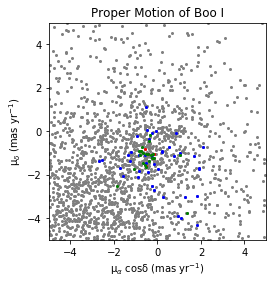

In [28]:
#Original gaia data in grey, koposov cross check is blue, martin cross check is red, Norris cross check is in green

plt.scatter(df.pmra,df.pmdec, s=4, color="grey")

plt.scatter(koppmra_fromgaia_byrv_inrange,koppmdec_fromgaia_byrv_inrange,color="blue",s=4) #The only proper motions with matching radial velocities

#plt.scatter(koppmra_fit_fromgaia_byrv_outrange,koppmdec_fit_fromgaia_byrv_outrange,color="orange",s=4) #The only proper motions with no matching radial velocities

plt.scatter(martinpmra_member,martinpmdec_member,s=4,color="red")

plt.scatter(norrispmra_member,norrispmdec_member,s=4,color="green")

plt.xlabel("μ$_α$ cosδ (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("ProperMotionScatterPlotNoError.png",dpi=300)

plt.show()

### Plotting the proper motion with error bars

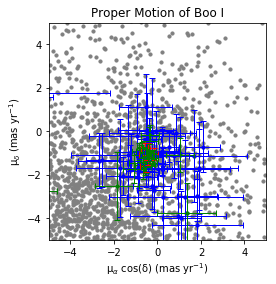

In [29]:
#This is with the radial velocities within 90-105 km/s range

pointsize=10

plt.scatter(df.pmra,df.pmdec,color="grey", s=pointsize)

graphboundary=5

plt.xlim(-graphboundary,graphboundary)
plt.ylim(-graphboundary,graphboundary)

#Koposov data
plt.scatter(koppmra_fromgaia_byrv_inrange,koppmdec_fromgaia_byrv_inrange,color="blue",s=pointsize) #The only proper motions with matching radial velocities
plt.errorbar(koppmra_fromgaia_byrv_inrange,koppmdec_fromgaia_byrv_inrange,koppmra_error_fromgaia_byrv_inrange,koppmdec_error_fromgaia_byrv_inrange,linestyle="none",capsize=3,color="blue",elinewidth=1)

#Martin Data
plt.scatter(martinpmra_member,martinpmdec_member,s=pointsize,color="red")
plt.errorbar(martinpmra_member,martinpmdec_member,martinpmra_error_member,martinpmdec_error_member,linestyle="none",capsize=3,color="red",elinewidth=1)

#Norris Data
plt.scatter(norrispmra_member,norrispmdec_member,s=pointsize,color="green")
plt.errorbar(norrispmra_member,norrispmdec_member,norrispmra_error_member,norrispmdec_error_member,linestyle="none",capsize=3,color="green",elinewidth=1)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.gca().set_aspect('equal')
plt.savefig("ProperMotionScatterPlotWithError_byrv.png",dpi=300)

plt.show()

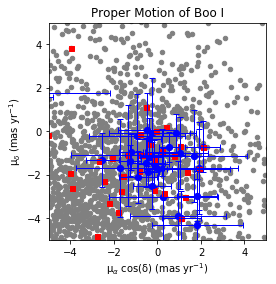

In [30]:
#This is just when using the minimum distance fitting algorithm

plt.scatter(df.pmra,df.pmdec,color="grey", s=20)

plt.xlim(-graphboundary,graphboundary)
plt.ylim(-graphboundary,graphboundary)

plt.errorbar(crosscheckpmra,crosscheckpmdec,crosscheckpmra_error,crosscheckpmdec_error,linestyle="none",capsize=3,color="blue",elinewidth=1)
plt.scatter(crosscheckpmra,crosscheckpmdec,color="blue",s=40)
plt.scatter(badpmra,badpmdec,color="red",marker="s",s=25)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("ProperMotionScatterPlotWithError_puredist.png",dpi=300)

plt.show()

### Plotting the Color Magnitude Diagram without Error Bars

In [31]:
#plt.scatter((df.bp_rp), '''Placeholder for absolute magnitude''', s=1)
#plt.xlabel("B-R mean Magnitude")
#plt.ylabel("Absolute Magnitude")
#plt.title("Color magnitude diagram of Boo I")
#plt.savefig("ColorMagScatterPlot.png",dpi=300)
#plt.show()

### Position Diagram

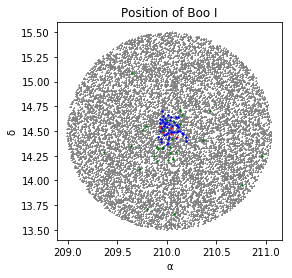

In [32]:
plt.scatter(df.ra,df.dec, s=1,color="grey",marker="+")

plt.scatter(kopra_fit_byrv_inrange,kopdec_fit_byrv_inrange,s=2,color="blue")

plt.scatter(norrisrafit_member,norrisdecfit_member,s=2,color="green")

plt.scatter(martinrafit_member,martindecfit_member,s=2,color="red")

plt.xlabel("α")
plt.ylabel("δ")
plt.title("Position of Boo I")
plt.gca().set_aspect('equal')

plt.savefig("Positionplot.png",dpi=400)

plt.show()

#print("Number of Koposov fits:",len(kopra_nofit_byrv_inrange)+len(kopra_fit_byrv_inrange)+len(kopra_fit_byrv_outrange)+len(kopra_nofit_byrv_outrange))

In [33]:
'''for i in range(len(martinpmra_member)):
    if martinpmra_member[i]>0 and martinpmra_member[i]<2 and martinpmdec_member[i]<-2:
        print("RA:",martinrafit_member[i])
        print("Dec:",martindecfit_member[i])
        print("PM-RA:",martinpmra_member[i])
        print("PM-Dec:",martinpmdec_member[i])
        print()'''
#martinpmra_member,martinpmdec_member

'for i in range(len(martinpmra_member)):\n    if martinpmra_member[i]>0 and martinpmra_member[i]<2 and martinpmdec_member[i]<-2:\n        print("RA:",martinrafit_member[i])\n        print("Dec:",martindecfit_member[i])\n        print("PM-RA:",martinpmra_member[i])\n        print("PM-Dec:",martinpmdec_member[i])\n        print()'

In [34]:
'''for i in range(len(koppmdec_fromgaia_byrv_inrange)):
    if koppmdec_fromgaia_byrv_inrange[i]<=-5:
        print(i)
        print("Pm-Dec:",koppmdec_fromgaia_byrv_inrange[i])
        print("Pm-RA:",koppmra_fromgaia_byrv_inrange[i])
        print("RA:",kopra_fit_byrv_inrange[i])
        print("Dec:",kopdec_fit_byrv_inrange[i])
'''
#checking for the index value of the outlier value

'for i in range(len(koppmdec_fromgaia_byrv_inrange)):\n    if koppmdec_fromgaia_byrv_inrange[i]<=-5:\n        print(i)\n        print("Pm-Dec:",koppmdec_fromgaia_byrv_inrange[i])\n        print("Pm-RA:",koppmra_fromgaia_byrv_inrange[i])\n        print("RA:",kopra_fit_byrv_inrange[i])\n        print("Dec:",kopdec_fit_byrv_inrange[i])\n'

In [35]:
'''#removing the outlier value

del koppmdec_fromgaia_byrv_inrange[15]
del koppmra_fromgaia_byrv_inrange[15]
del koppmdec_error_fromgaia_byrv_inrange[15]
del koppmra_error_fromgaia_byrv_inrange[15]
del kopra_fit_byrv_inrange[15]
del kopdec_fit_byrv_inrange[15]'''

'#removing the outlier value\n\ndel koppmdec_fromgaia_byrv_inrange[15]\ndel koppmra_fromgaia_byrv_inrange[15]\ndel koppmdec_error_fromgaia_byrv_inrange[15]\ndel koppmra_error_fromgaia_byrv_inrange[15]\ndel kopra_fit_byrv_inrange[15]\ndel kopdec_fit_byrv_inrange[15]'

In [36]:
'''for i in range(len(koppmdec_fromgaia_byrv_inrange)):
    if koppmdec_fromgaia_byrv_inrange[i]<=-5:
        print(i)
        print("Pm-Dec:",koppmdec_fromgaia_byrv_inrange[i])
        print("Pm-RA:",koppmra_fromgaia_byrv_inrange[i])
        print("RA:",kopra_fit_byrv_inrange[i])
        print("Dec:",kopdec_fit_byrv_inrange[i])
        
#Making sure the value was removed'''

'for i in range(len(koppmdec_fromgaia_byrv_inrange)):\n    if koppmdec_fromgaia_byrv_inrange[i]<=-5:\n        print(i)\n        print("Pm-Dec:",koppmdec_fromgaia_byrv_inrange[i])\n        print("Pm-RA:",koppmra_fromgaia_byrv_inrange[i])\n        print("RA:",kopra_fit_byrv_inrange[i])\n        print("Dec:",kopdec_fit_byrv_inrange[i])\n        \n#Making sure the value was removed'

In [37]:
pmragraphlim=4

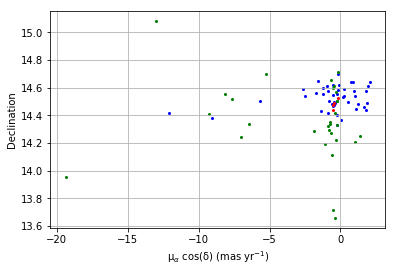

5 5


In [38]:
#pmra vs dec

plt.scatter(koppmra_fromgaia_byrv_inrange,kopdec_fit_byrv_inrange,color="blue",s=4)

plt.scatter(martinpmra_member,martindecfit_member,color="red",s=4)

plt.scatter(norrispmra_member,norrisdecfit_member,color="green",s=4)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("Declination")
#plt.xlim(-pmragraphlim,pmragraphlim)

plt.grid()

plt.savefig("PMRAvsDec.png",dpi=400)
plt.show()



print(len(martinpmra_member),len(martindecfit_member))

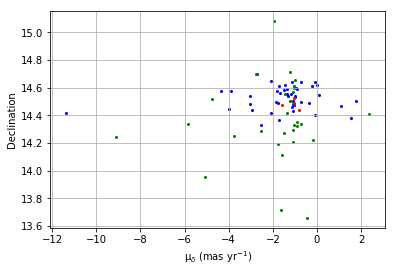

In [39]:
#pmdec vs dec

plt.scatter(koppmdec_fromgaia_byrv_inrange,kopdec_fit_byrv_inrange,color="blue",s=4)

plt.scatter(martinpmdec_member,martindecfit_member,color="red",s=4)

plt.scatter(norrispmdec_member,norrisdecfit_member,color="green",s=4)

plt.xlabel("μ$_δ$ (mas yr$^{-1}$)")
plt.ylabel("Declination")

plt.grid()

plt.savefig("PMDecvsDec.png",dpi=400)

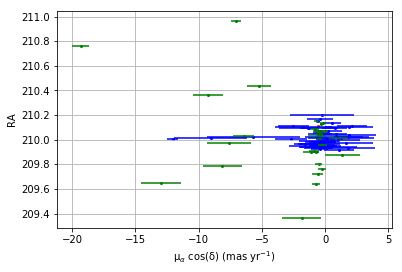

In [40]:
#pmra vs ra

plt.scatter(koppmra_fromgaia_byrv_inrange,kopra_fit_byrv_inrange,color="blue",s=4)
plt.errorbar(koppmra_fromgaia_byrv_inrange,kopra_fit_byrv_inrange,0,koppmra_error_fromgaia_byrv_inrange,color="blue",linestyle="none")

plt.scatter(martinpmra_member,martinrafit_member,color="red",s=4)

plt.scatter(norrispmra_member,norrisrafit_member,color="green",s=4)
plt.errorbar(norrispmra_member,norrisrafit_member,0,norrispmra_error_member,color="green",linestyle="none")

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("RA")

plt.grid()

plt.savefig("PMRAvsRA.png",dpi=400)

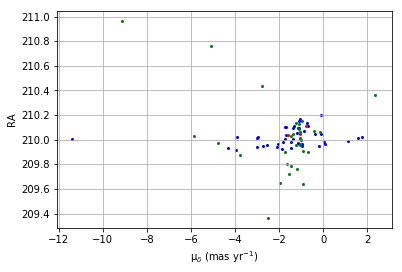

In [41]:
#pmdec vs ra

plt.scatter(koppmdec_fromgaia_byrv_inrange,kopra_fit_byrv_inrange,color="blue",s=4)

plt.scatter(martinpmdec_member,martinrafit_member,color="red",s=4)

plt.scatter(norrispmdec_member,norrisrafit_member,color="green",s=4)

plt.xlabel("μ$_δ$ (mas yr$^{-1}$)")
plt.ylabel("RA")

plt.grid()

plt.savefig("PMDecvsRA.png",dpi=400)

In [42]:
#Appending all the proper motions of koposov, martin, and norris

ra_all=[]
dec_all=[]
pmra_all=[]
pmdec_all=[]
pmra_error_all=[]
pmdec_error_all=[]

for i in range(len(koppmra_fromgaia_byrv_inrange)):
    ra_all.append(kopra_fit_byrv_inrange[i])
    dec_all.append(kopdec_fit_byrv_inrange[i])
    pmra_all.append(koppmra_fromgaia_byrv_inrange[i])
    pmdec_all.append(koppmdec_fromgaia_byrv_inrange[i])
    pmra_error_all.append(koppmra_error_fromgaia_byrv_inrange[i])
    pmdec_error_all.append(koppmdec_error_fromgaia_byrv_inrange[i])
    
for i in range(len(martinpmra_member)):
    ra_all.append(martinrafit_member[i])
    dec_all.append(martindecfit_member[i])
    pmra_all.append(martinpmra_member[i])
    pmdec_all.append(martinpmdec_member[i])
    pmra_error_all.append(martinpmra_error_member[i])
    pmdec_error_all.append(martinpmdec_error_member[i])

for i in range(len(norrispmra_member)):
    ra_all.append(norrisrafit_member[i])
    dec_all.append(norrisdecfit_member[i])
    pmra_all.append(norrispmra_member[i])
    pmdec_all.append(norrispmdec_member[i])
    pmra_error_all.append(norrispmra_error_member[i])
    pmdec_error_all.append(norrispmdec_error_member[i])

ra_tmp=[]
dec_tmp=[]
pmra_tmp=[]
pmdec_tmp=[]
pmra_error_tmp=[]
pmdec_error_tmp=[]

for i in range(len(ra_all)):
     if str(pmra_all[i])!="nan":
            ra_tmp.append(ra_all[i])
            dec_tmp.append(dec_all[i])
            pmra_tmp.append(pmra_all[i])
            pmdec_tmp.append(pmdec_all[i])
            pmra_error_tmp.append(pmra_error_all[i])
            pmdec_error_tmp.append(pmdec_error_all[i])

ra_all=ra_tmp
dec_all=dec_tmp
pmra_all=pmra_tmp
pmdec_all=pmdec_tmp
pmra_error_all=pmra_error_tmp
pmdec_error_all=pmdec_error_tmp

In [43]:
#clipping based on observations of graphs, pmra>-5

ra_clip=[]
dec_clip=[]
pmra_clip=[]
pmdec_clip=[]
pmra_error_clip=[]
pmdec_error_clip=[]

for i in range(len(ra_all)):
    if pmra_all[i]>-5 and pmdec_all[i]>-5:
        ra_clip.append(ra_all[i])
        dec_clip.append(dec_all[i])
        pmra_clip.append(pmra_all[i])
        pmdec_clip.append(pmdec_all[i])
        pmra_error_clip.append(pmra_error_all[i])
        pmdec_error_clip.append(pmdec_error_all[i])
        
print(len(ra_clip),len(dec_clip),len(pmra_clip),len(pmdec_clip),len(pmra_error_clip),len(pmdec_error_clip))

67 67 67 67 67 67


In [44]:
#pmdec weighted means

pmdecmeantop=0
pmdecmeanbottom=0

for i in range(len(pmdec_all)):
    pmdecmeantop+=pmdec_all[i]/(pmdec_error_all[i]**2)
    pmdecmeanbottom+=1/(pmdec_error_all[i]**2)
    
pmdec_mean_val=pmdecmeantop/pmdecmeanbottom
pmdec_uncertainty=np.sqrt(1/(pmdecmeanbottom))

print("Mean PM-Dec:",pmdec_mean_val)
print("Uncertainty:",pmdec_uncertainty)

Mean PM-Dec: -1.3076758181627466
Uncertainty: 0.03462490385129327


In [45]:
#pmra weighted means without sorting

pmrameantop=0
pmrameanbottom=0

for i in range(len(pmra_all)):
    pmrameantop+=pmra_all[i]/(pmra_error_all[i]**2)
    pmrameanbottom+=1/(pmra_error_all[i]**2)

pmra_mean_val=pmrameantop/pmrameanbottom
pmra_uncertainty=np.sqrt(1/(pmrameanbottom))

print("Mean PM-RA:",pmra_mean_val)
print("Uncertainty:",pmra_uncertainty)

Mean PM-RA: -0.8242560963424078
Uncertainty: 0.046311091481507624


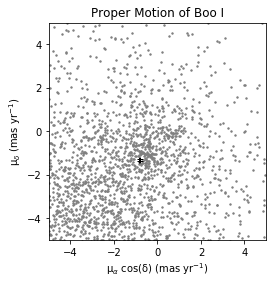

In [46]:
plt.scatter(df.pmra,df.pmdec,color="grey", s=2)

plt.xlim(-graphboundary,graphboundary)
plt.ylim(-graphboundary,graphboundary)

plt.errorbar(pmra_mean_val,pmdec_mean_val,pmra_uncertainty,pmdec_uncertainty,color="black",capsize=3)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("ProperMotionWeightedMeanPlot.png",dpi=300)

plt.show()

### Sorting by RA

In [47]:
import operator

#sorting algorithm here

radict_byra={}
decdict_byra={}
pmradict_byra={}
pmdecdict_byra={}
pmra_errordict_byra={}
pmdec_errordict_byra={}

a=len(ra_all)

for i in range(a): #appending all the ra values into a dictionary
    radict_byra[i]=ra_all[i]
    decdict_byra[i]=dec_all[i]
    pmradict_byra[i]=pmra_all[i]
    pmdecdict_byra[i]=pmdec_all[i]
    pmra_errordict_byra[i]=pmra_error_all[i]
    pmdec_errordict_byra[i]=pmdec_error_all[i]

sorted_radict = sorted(radict_byra.items(), key=operator.itemgetter(1))
radict_loc=[x[0] for x in sorted_radict]

ralistbyra=[]
declistbyra=[]
pmralistbyra=[]
pmdeclistbyra=[]
pmra_errorlistbyra=[]
pmdec_errorlistbyra=[]

for i in range(len(radict_loc)):
    ralistbyra.append(radict_byra[radict_loc[i]])
    declistbyra.append(decdict_byra[radict_loc[i]])
    pmralistbyra.append(pmradict_byra[radict_loc[i]])
    pmdeclistbyra.append(pmdecdict_byra[radict_loc[i]])
    pmra_errorlistbyra.append(pmra_errordict_byra[radict_loc[i]])
    pmdec_errorlistbyra.append(pmdec_errordict_byra[radict_loc[i]])

### Top half and bottom half values after sorted by RA

In [48]:
#top half calculations

#Lists are categorized by coordinate system, which half, what it's sorted by, what side of the fraction

pmra_tophalf_byra_topfrac=0
pmra_tophalf_byra_bottomfrac=0

pmdec_tophalf_byra_topfrac=0
pmdec_tophalf_byra_bottomfrac=0

for i in range(int(len(ralistbyra)/2)):
    pmra_tophalf_byra_topfrac+=pmralistbyra[i]/(pmra_errorlistbyra[i])**2
    pmra_tophalf_byra_bottomfrac+=1/(pmra_errorlistbyra[i])**2 
    
    pmdec_tophalf_byra_topfrac+=pmdeclistbyra[i]/(pmdec_errorlistbyra[i])**2
    pmdec_tophalf_byra_bottomfrac+=1/(pmdec_errorlistbyra[i])**2
    
pmra_tophalf_byra_mean=pmra_tophalf_byra_topfrac/pmra_tophalf_byra_bottomfrac #pmra tophalf mean sorted by ra
pmra_error_tophalf_byra_mean=np.sqrt(1/pmra_tophalf_byra_bottomfrac) #pmra uncertainty tophalf mean sorted by ra

pmdec_tophalf_byra_mean=pmdec_tophalf_byra_topfrac/pmdec_tophalf_byra_bottomfrac #pmdec tophalf mean sorted by ra
pmdec_error_tophalf_byra_mean=np.sqrt(1/pmdec_tophalf_byra_bottomfrac) #pmdec uncertainty tophalf mean sorted by ra

In [49]:
#bottom half calculations

#Lists are categorized by coordinate system, which half, what it's sorted by

pmra_bottomhalf_byra_topfrac=0
pmra_bottomhalf_byra_bottomfrac=0

pmdec_bottomhalf_byra_topfrac=0
pmdec_bottomhalf_byra_bottomfrac=0

for i in range(int(len(ralistbyra)/2),int(len(ralistbyra))):
    pmra_bottomhalf_byra_topfrac+=pmralistbyra[i]/(pmra_errorlistbyra[i])**2
    pmra_bottomhalf_byra_bottomfrac+=1/(pmra_errorlistbyra[i])**2 

    pmdec_bottomhalf_byra_topfrac+=pmdeclistbyra[i]/(pmdec_errorlistbyra[i])**2
    pmdec_bottomhalf_byra_bottomfrac+=1/(pmdec_errorlistbyra[i])**2

pmra_bottomhalf_byra_mean=pmra_bottomhalf_byra_topfrac/pmra_bottomhalf_byra_bottomfrac #pmra bottom half mean sorted by ra
pmra_error_bottomhalf_byra_mean=np.sqrt(1/pmra_bottomhalf_byra_bottomfrac) #pmra uncertainty bottom half mean sorted by ra

pmdec_bottomhalf_byra_mean=pmdec_bottomhalf_byra_topfrac/pmdec_bottomhalf_byra_bottomfrac
pmdec_error_bottomhalf_byra_mean=np.sqrt(1/pmdec_bottomhalf_byra_bottomfrac)

In [50]:
#printing out the top half, bottom half pmra, pmdec, and uncertainties sorted by RA

print("Top Half PM-RA Mean after sorting by RA:",pmra_tophalf_byra_mean)
print("Top Half PM-RA Uncertainty Mean after sorting by RA:",pmra_error_tophalf_byra_mean)
print()
print("Bottom Half PM-RA Mean after sorting by RA:",pmra_bottomhalf_byra_mean)
print("Bottom Half PM-RA Uncertainty Mean after sorting by RA:",pmra_error_bottomhalf_byra_mean)
print()
print("Top Half PM-Dec Mean after sorting by RA:",pmdec_tophalf_byra_mean)
print("Top Half PM-Dec Uncertainty Mean after sorting by RA:",pmdec_error_tophalf_byra_mean)
print()
print("Bottom Half PM-Dec Mean after sorting by RA:",pmdec_bottomhalf_byra_mean)
print("Bottom Half PM-Dec Uncertainty Mean after sorting by RA:",pmdec_error_bottomhalf_byra_mean)

Top Half PM-RA Mean after sorting by RA: -0.8586759794649212
Top Half PM-RA Uncertainty Mean after sorting by RA: 0.07030233050162447

Bottom Half PM-RA Mean after sorting by RA: -0.797869813861564
Bottom Half PM-RA Uncertainty Mean after sorting by RA: 0.06155369526047291

Top Half PM-Dec Mean after sorting by RA: -1.4146568718753127
Top Half PM-Dec Uncertainty Mean after sorting by RA: 0.056567205262572307

Bottom Half PM-Dec Mean after sorting by RA: -1.2435778022481798
Bottom Half PM-Dec Uncertainty Mean after sorting by RA: 0.04378582937845364


### Sorting by Dec

In [51]:
#sorting algorithm here

radict_bydec={}
decdict_bydec={}
pmradict_bydec={}
pmdecdict_bydec={}
pmra_errordict_bydec={}
pmdec_errordict_bydec={}

a=len(ra_all)

for i in range(a): #appending all the ra values into a dictionary
    radict_bydec[i]=ra_all[i]
    decdict_bydec[i]=dec_all[i]
    pmradict_bydec[i]=pmra_all[i]
    pmdecdict_bydec[i]=pmdec_all[i]
    pmra_errordict_bydec[i]=pmra_error_all[i]
    pmdec_errordict_bydec[i]=pmdec_error_all[i]

sorted_decdict = sorted(decdict_bydec.items(), key=operator.itemgetter(1))
decdict_loc=[x[0] for x in sorted_decdict]

ralistbydec=[]
declistbydec=[]
pmralistbydec=[]
pmdeclistbydec=[]
pmra_errorlistbydec=[]
pmdec_errorlistbydec=[]

for i in range(len(decdict_loc)):
    ralistbydec.append(radict_bydec[decdict_loc[i]])
    declistbydec.append(decdict_bydec[decdict_loc[i]])
    pmralistbydec.append(pmradict_bydec[decdict_loc[i]])
    pmdeclistbydec.append(pmdecdict_bydec[decdict_loc[i]])
    pmra_errorlistbydec.append(pmra_errordict_bydec[decdict_loc[i]])
    pmdec_errorlistbydec.append(pmdec_errordict_bydec[decdict_loc[i]])

### Top half and bottom half values sorted by Dec

In [52]:
#top half calculations

pmra_tophalf_bydec_topfrac=0
pmra_tophalf_bydec_bottomfrac=0

pmdec_tophalf_bydec_topfrac=0
pmdec_tophalf_bydec_bottomfrac=0

for i in range(int(a/2)):
    pmra_tophalf_bydec_topfrac+=pmralistbydec[i]/(pmra_errorlistbydec[i]**2)
    pmra_tophalf_bydec_bottomfrac+=1/(pmra_errorlistbydec[i]**2)

    pmdec_tophalf_bydec_topfrac+=pmdeclistbydec[i]/(pmdec_errorlistbydec[i]**2)
    pmdec_tophalf_bydec_bottomfrac+=1/(pmdec_errorlistbydec[i]**2)

pmra_tophalf_bydec_mean=pmra_tophalf_bydec_topfrac/pmra_tophalf_bydec_bottomfrac
pmra_error_tophalf_bydec_mean=np.sqrt(1/pmra_tophalf_bydec_bottomfrac)

pmdec_tophalf_bydec_mean=pmdec_tophalf_bydec_topfrac/pmdec_tophalf_bydec_bottomfrac
pmdec_error_tophalf_bydec_mean=np.sqrt(1/pmdec_tophalf_bydec_bottomfrac)

In [53]:
#bottom half calculations

pmra_bottomhalf_bydec_topfrac=0
pmra_bottomhalf_bydec_bottomfrac=0

pmdec_bottomhalf_bydec_topfrac=0
pmdec_bottomhalf_bydec_bottomfrac=0

for i in range(int(a/2),a):
    pmra_bottomhalf_bydec_topfrac+=pmralistbydec[i]/(pmra_errorlistbydec[i]**2)
    pmra_bottomhalf_bydec_bottomfrac+=1/(pmra_errorlistbydec[i]**2)

    pmdec_bottomhalf_bydec_topfrac+=pmdeclistbydec[i]/(pmdec_errorlistbydec[i]**2)
    pmdec_bottomhalf_bydec_bottomfrac+=1/(pmdec_errorlistbydec[i]**2)
    
pmra_bottomhalf_bydec_mean=pmra_bottomhalf_bydec_topfrac/pmra_bottomhalf_bydec_bottomfrac
pmra_error_bottomhalf_bydec_mean=np.sqrt(1/pmra_bottomhalf_bydec_bottomfrac)

pmdec_bottomhalf_bydec_mean=pmdec_bottomhalf_bydec_topfrac/pmdec_bottomhalf_bydec_bottomfrac
pmdec_error_bottomhalf_bydec_mean=np.sqrt(1/pmdec_bottomhalf_bydec_bottomfrac)

### Printing out the top half and bottom half means

In [54]:
print("Top Half PM-RA Mean after sorting by Dec:",pmra_tophalf_bydec_mean)
print("Top Half PM-RA Uncertainty Mean after sorting by Dec:",pmra_error_tophalf_bydec_mean)
print()
print("Bottom Half PM-RA Mean after sorting by Dec:",pmra_bottomhalf_bydec_mean)
print("Bottom Half PM-RA Uncertainty Mean after sorting by Dec:",pmra_error_bottomhalf_bydec_mean)
print()
print("Top Half PM-Dec Mean after sorting by Dec:",pmdec_tophalf_bydec_mean)
print("Top Half PM-Dec Uncertainty Mean after sorting by Dec:",pmdec_error_tophalf_bydec_mean)
print()
print("Bottom Half PM-Dec Mean after sorting by Dec:",pmdec_bottomhalf_bydec_mean)
print("Bottom Half PM-Dec Uncertainty Mean after sorting by Dec:",pmdec_error_bottomhalf_bydec_mean)

Top Half PM-RA Mean after sorting by Dec: -1.1411040684309492
Top Half PM-RA Uncertainty Mean after sorting by Dec: 0.0652257098081434

Bottom Half PM-RA Mean after sorting by Dec: -0.5021453620929776
Bottom Half PM-RA Uncertainty Mean after sorting by Dec: 0.06576516997259887

Top Half PM-Dec Mean after sorting by Dec: -1.5354762902469885
Top Half PM-Dec Uncertainty Mean after sorting by Dec: 0.051148219132703676

Bottom Half PM-Dec Mean after sorting by Dec: -1.114975088424491
Bottom Half PM-Dec Uncertainty Mean after sorting by Dec: 0.047042986716757836


### The Proper motion plots for the member data sets

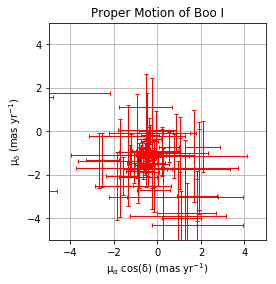

In [55]:
plt.scatter(pmra_all,pmdec_all, s=2, color="red")
plt.errorbar(pmra_all,pmdec_all,pmra_error_all,pmdec_error_all,color="red",capsize=2,linestyle="none",elinewidth=1)

plt.scatter(pmra_mean_val,pmdec_mean_val,color="black",s=5)
plt.errorbar(pmra_mean_val,pmdec_mean_val,pmra_uncertainty,pmdec_uncertainty,color="black",capsize=0.2)

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(pmra_mean_val,pmdec_mean_val,color="black",s=5)
plt.errorbar(pmra_mean_val,pmdec_mean_val,pmra_uncertainty,pmdec_uncertainty,color="black",capsize=0.2)

plt.grid()

plt.savefig("MemberPMRAvsMemberPMDec.png",dpi=300)

plt.show()

### Chi Squared tests

In [56]:
pmrachisquare=0
pmdecchisquare=0
pmra_chisquarelist=[]
pmdec_chisquarelist=[]

chidict={}

for i in range(len(pmra_all)):
    #chi squared for pmra
    pmrachi=((pmra_all[i]-pmra_mean_val)/pmra_error_all[i])**2
    pmrachisquare+=pmrachi
    pmra_chisquarelist.append(pmrachi)
    #print(pmrachi)
    
    #chi squared for pmdec
    pmdecchi=((pmdec_all[i]-pmdec_mean_val)/pmdec_error_all[i])**2
    pmdecchisquare+=pmdecchi
    pmdec_chisquarelist.append(pmdecchi)
    #print(pmdecchi)
    
    #print()
    
    chidict[pmrachi]=pmdecchi

print("n-1 d.o.f.:",len(pmra_all)-1)
print("PM-RA Chi Square Value:",pmrachisquare)
print("PM-Dec Chi Square Value:",pmdecchisquare)



n-1 d.o.f.: 77
PM-RA Chi Square Value: 1934.019737368529
PM-Dec Chi Square Value: 1479.0250616014837


In [57]:
#Chi squared narrowing by sorting in the ordered dictionary

#print()

#print(chidict)

print()

sorted_chidict = [(k,v) for k,v in chidict.items()]

#print(sorted_chidict)

chidict_bypmra=sorted(sorted_chidict, key=lambda x: x[0])

chidict_bypmdec=sorted(sorted_chidict, key=lambda x: x[1])


#print(chidict_bypmra)

#print(chidict_bypmdec)

sumpmra_byra=0
sumpmdec_byra=0

b=22

#by pmra
for i in range(0,len(chidict_bypmra)-b):
    sumpmra_byra+=chidict_bypmra[i][0]
    sumpmdec_byra+=chidict_bypmra[i][1]
    
print("By PM-RA:",sumpmra_byra,sumpmdec_byra,len(chidict_bypmra)-b)

sumpmra_bydec=0
sumpmdec_bydec=0

#by pmdec
for i in range(0,len(chidict_bypmdec)-b):    
    sumpmdec_bydec+=chidict_bypmdec[i][1]
    sumpmra_bydec+=chidict_bypmdec[i][0]
    
print("By PM-Dec:",sumpmra_bydec,sumpmdec_bydec,len(chidict_bypmdec)-b)


By PM-RA: 44.31185067753747 87.7606574435726 56
By PM-Dec: 165.17970127931048 41.514608326638914 56


In [58]:
#clipped range mean values

pmra_clip_mean,pmra_error_mean_clip=weightedMean(pmra_clip,pmra_error_clip)

pmdec_clip_mean,pmdec_error_mean_clip=weightedMean(pmdec_clip,pmdec_error_clip)

cliplen=len(pmra_clip)-1

print("Clipped means and errors")
print("PM-RA:",pmra_clip_mean,pmra_error_mean_clip)
print("PM-Dec:",pmdec_clip_mean,pmdec_error_mean_clip)
print("n-1 d.o.f.:",cliplen)

Clipped means and errors
PM-RA: -0.46287013198316107 0.04720665644289171
PM-Dec: -1.1094468987101394 0.035199267322523646
n-1 d.o.f.: 66


In [59]:
#chi square tests for clipped values

pmrachisquare_clip=0
pmdecchisquare_clip=0

print("n-1 d.o.f.:",cliplen)

for i in range(len(pmra_clip)):
    pmrachisquare_clip+=((pmra_clip[i]-pmra_clip_mean)/pmra_error_clip[i])**2
    
    pmdecchisquare_clip+=((pmdec_clip[i]-pmdec_clip_mean)/pmdec_error_clip[i])**2

print("PM-RA:",pmrachisquare_clip)
print("PM-Dec:",pmdecchisquare_clip)

n-1 d.o.f.: 66
PM-RA: 60.26049444621204
PM-Dec: 84.18659531268904


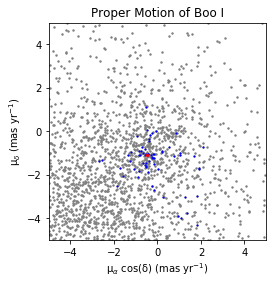

In [60]:
plt.scatter(df.pmra,df.pmdec,color="grey", s=2)


#plt.errorbar(pmra_clip,pmdec_clip,pmdec_error_clip,pmra_error_clip,linestyle="none",color="blue")
plt.scatter(pmra_clip,pmdec_clip,color="blue",s=1)

plt.scatter(pmra_clip_mean,pmdec_clip_mean,s=5,color="red")

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Boo I")
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("PMRAvsPMDEC_clip.png",dpi=300)

plt.show()